<a href="https://www.kaggle.com/code/adnanzamanniloy/neural-network-for-heart-disease-detectection?scriptVersionId=248701351" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping


2025-07-03 18:14:07.538789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751566447.765801      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751566447.828454      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
X = df.drop('target', axis=1)
y= df['target']
print(X.shape, y.shape)


(1025, 13) (1025,)


### We split the data into training and testing sets using an 80-20 ratio to evaluate model performance

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(820, 13) (820,)
(205, 13) (205,)


### Scale input features

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Build model

In [7]:
tf.random.set_seed(42)

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-03 18:14:21.734486: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


###  Callbacks : we saves the model only when validation accuracy improves.

In [8]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    mode='max', 
    save_best_only=True, 
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



### Train the model

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=200,                  
    batch_size=64,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6406 - loss: 0.6508
Epoch 1: val_accuracy improved from -inf to 0.78049, saving model to best_model.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5740 - loss: 0.6766 - val_accuracy: 0.7805 - val_loss: 0.6142
Epoch 2/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7500 - loss: 0.6183
Epoch 2: val_accuracy improved from 0.78049 to 0.80488, saving model to best_model.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7389 - loss: 0.5949 - val_accuracy: 0.8049 - val_loss: 0.5402
Epoch 3/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7031 - loss: 0.5621
Epoch 3: val_accuracy improved from 0.80488 to 0.85366, saving model to best_model.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7869 - loss: 0.5144 - val_accuracy: 0.8537 - val_loss: 0.4709
Epoch 4/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8281 - loss: 0.4229
Epoch 4: val_accuracy did not improve from 0.85366
12/12

### Plot training & validation accuracy values

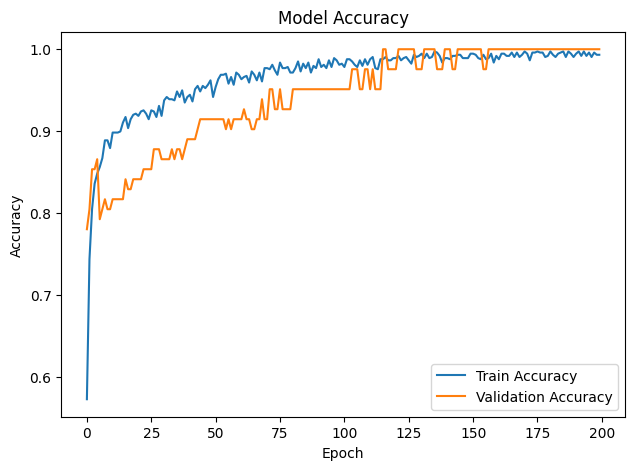

In [10]:

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Plot training & validation loss values

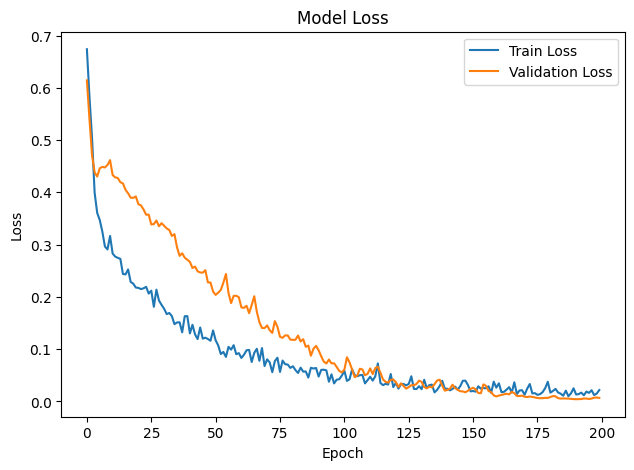

In [11]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluate


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.1401 


### Classification report

In [13]:

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

